■ 7장. CNN (Convolution Neural network) 합성곱 신경망

    " Convolution 층과 pooling 층을 포함하는 신경망 "
    
    ※ 기존 신경망과의 창?
    
        - 기존방법: Affine  -->  ReLU
        - CNN     : Conv    -->  ReLU  -->  Pooling

    - 기존에 구현했던 완전 연결 계층의 문제점?
    
        " 데이터 형상이 무시된다 "
        
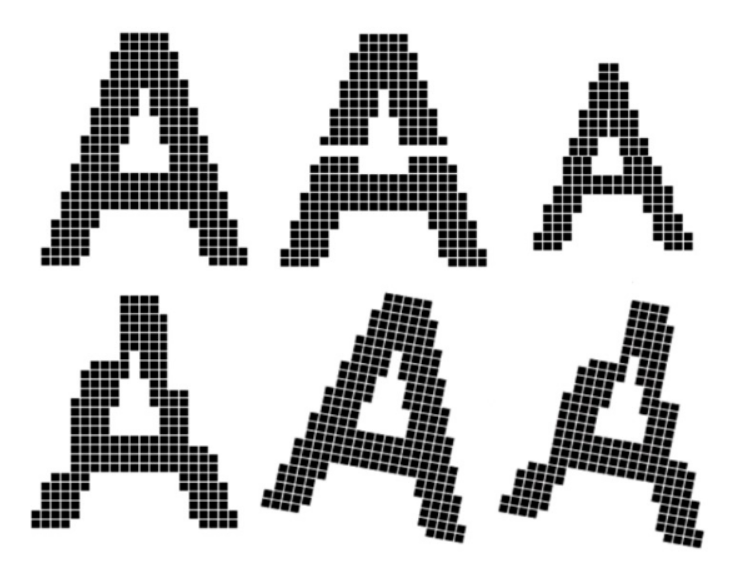

       기존방법:필기체는 28 X 28=784의 1차원 데이터로 변경을 해서 784개의 데이터를 첫 affine 계층에 입력하는 방법
       
          글자의 크지가 달라지거나 글자가 회전되거나, 글자에 변형이 조금만 생기더라도
          새로운 학습 데이터를 넣어주지 않으면 좋은 결과를 기대하기 어렵다
          
          즉, 본직적인 패턴을 읽지 못한다.

    - 합성곱 계층
    
        원본 이미지를 가지고 여러개의 feature map을 만들어서 분류하는 완전 연결 계층에 입력한다.
        
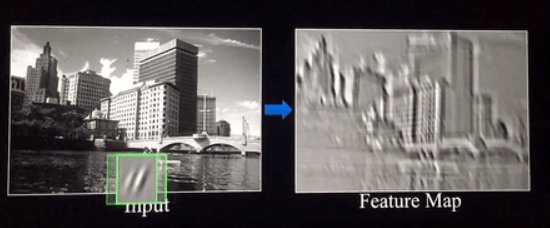

        feature mape(특징맵)을 만들고 그 feature map을 선명하게 해주는 층

**기존 계층**
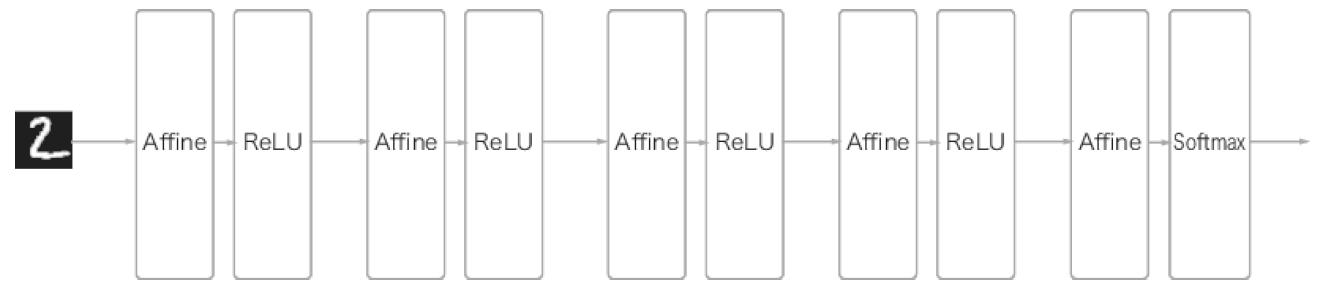

**합성곱 계층**
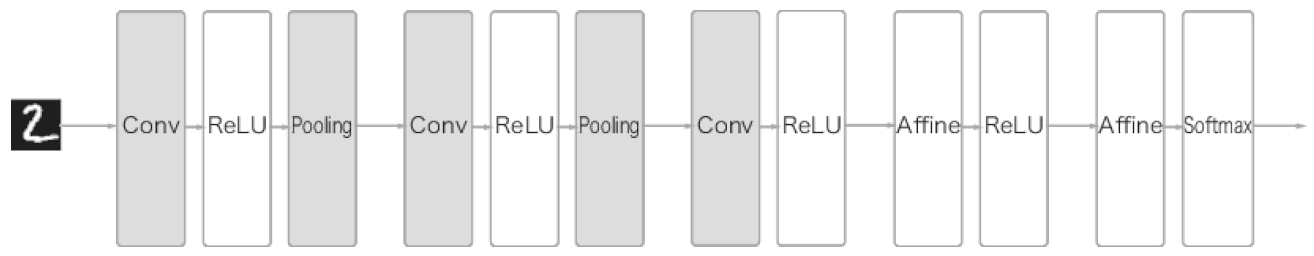
        

※ 합성곱 연산

    이미지 3차원(세로, 가로, 색상) data의 형상을 유지하면서 연산하는 작업
    
    " 입력 데이터에 필터를 적용한 것이 합성곱 연산이다."
    
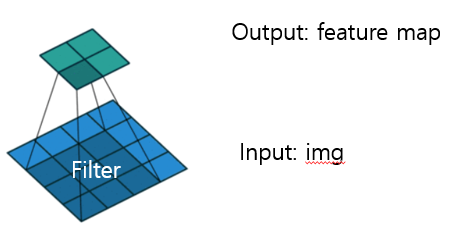

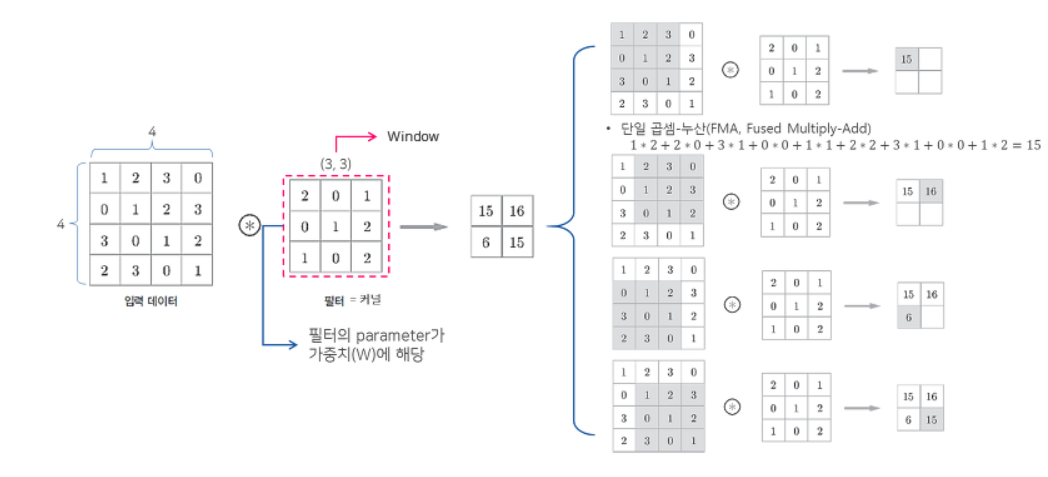

In [3]:
# 합성곱결과를 출력하시오
import numpy as np

a = np.array([[1,2,3],[0,1,2],[3,0,1]])  # input_x
b = np.array([[2,0,1],[0,1,2],[1,0,2]])  # filter_

print(a*b)
print(np.sum(a*b)) # 곱셈누산

[[2 0 3]
 [0 1 4]
 [3 0 2]]
15


In [40]:
# 행렬을 만드시오

input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])

# print(np.array(input_.flatten()[:9]).reshape(3,3))
print(input_[:3,:3])
print(input_[:3,1:3+1])
print(input_[1:3+1,:3])
print(input_[1:3+1,1:3+1])

[[1 2 3]
 [0 1 2]
 [3 0 1]]
[[2 3 0]
 [1 2 3]
 [0 1 2]]
[[0 1 2]
 [3 0 1]
 [2 3 0]]
[[1 2 3]
 [0 1 2]
 [3 0 1]]


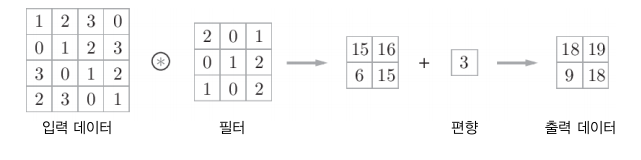

In [88]:
# 위의 그림을 파이썬으로 출력하시오
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=3
print(input_)
print(filter_)

# print(input_.shape)

# ((0,3),(0,3)),((0,3),(1,4)),((1,4),(0,3)),((1,4),(1,4))
a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

print(np.array(result2).reshape(a,b))
result = np.array(result2).reshape(a,b)

[[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[18 19]
 [ 9 18]]


■ 패딩

    " 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값으로 채워 늘리는 것을 말한다. "
    
    ※ 패딩이 필요한 이유?
        
        패딩을 하지 않을 경우 data의 공간 크지는 합성곱 계층을 지날때마다 작아지게 되므로
        가장자리 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용한다.
    
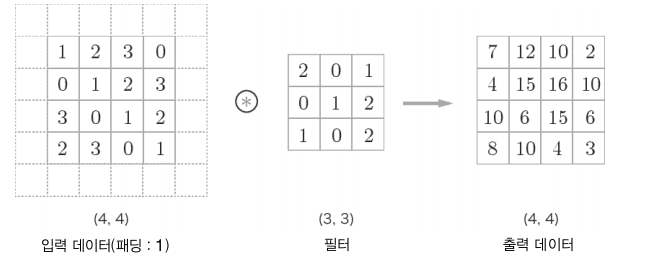

In [90]:
# 패딩구현하기
print(result)
result_pad = np.pad(result, pad_width=1, mode='constant', constant_values=0)
print(result_pad)

[[18 19]
 [ 9 18]]
[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


■ 출력 크기 공식
    
    " 필터를 적용하는 위치의 간격을 스트라이드라고 한다. "
    
    예: 위에서 구현한 conv는 스트라이드가 1이다.
    
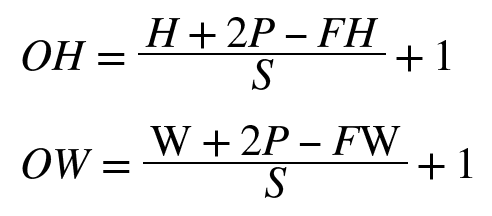

입력크기를 (H, W), 필터 크기를 (FH, FW), 출력 크기를 (OH, OW), 패댕을 P, 스트라이드를 S라고 하면 출력크기는 위의 식으로 계산한다.


        (OH - 1) * S - H + FH
    P = ------------------------
                     2

In [104]:
# input_img = 4 X 4 , filter = 3 X 3 , output = 4 X 4 ? 패딩으로 조절해보기
p = (1/2) * (((input_.shape[0] - 1) * 1) - input_.shape[0] + filter_.shape[0])
# p = (1/2) * (((4-1) * 1) - 4 + 3)
print(p)

1.0


In [106]:
# 위의 그림을 파이썬으로 출력하시오
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=3
print(input_)
print(filter_)

# print(input_.shape)

# ((0,3),(0,3)),((0,3),(1,4)),((1,4),(0,3)),((1,4),(1,4))
a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

result = np.array(result2).reshape(a,b)
print(result)

# padding
p = (1/2) * (((input_.shape[0] - 1) * 1) - input_.shape[0] + filter_.shape[0])
result_pad = np.pad(result, pad_width=int(p), mode='constant', constant_values=0)
print(result_pad)

[[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[18 19]
 [ 9 18]]
[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


In [107]:
# input_img = 6 X 6 , filter = 3 X 3 , output = 6 X 6 ? 패딩으로 조절해보기
p = (1/2) * (((6 - 1) * 1) - 6 + 3)
print(p)


1.0


In [85]:
# 위의 그림을 파이썬으로 출력하시오
# 패딩 하드코딩으로 채움
# input_ = np.array([[0,0,0,0,0,0],[0,1,2,3,0,0],[0,0,1,2,3,0],[0,3,0,1,2,0],[0,2,3,0,1,0],[0,0,0,0,0,0]])
input_ = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
input_ = np.pad(input_, pad_width=1, mode='constant', constant_values=0)
filter_ = np.array([[2,0,1],[0,1,2],[1,0,2]])
bias=0
print(input_)
print(filter_)

# print(input_.shape)

a = input_.shape[0]-filter_.shape[0] + 1
b = input_.shape[1]-filter_.shape[1] + 1
result2 = []
for rn in range(a):
    for cn in range(b):
        result1 = input_[rn:rn+filter_.shape[0],cn:cn+filter_.shape[1]] * filter_
        result2.append(np.sum(result1)+bias)

result = np.array(result2).reshape(a,b)
print(result)

[[0 0 0 0 0 0]
 [0 1 2 3 0 0]
 [0 0 1 2 3 0]
 [0 3 0 1 2 0]
 [0 2 3 0 1 0]
 [0 0 0 0 0 0]]
[[2 0 1]
 [0 1 2]
 [1 0 2]]
[[ 7 12 10  2]
 [ 4 15 16 10]
 [10  6 15  6]
 [ 8 10  4  3]]


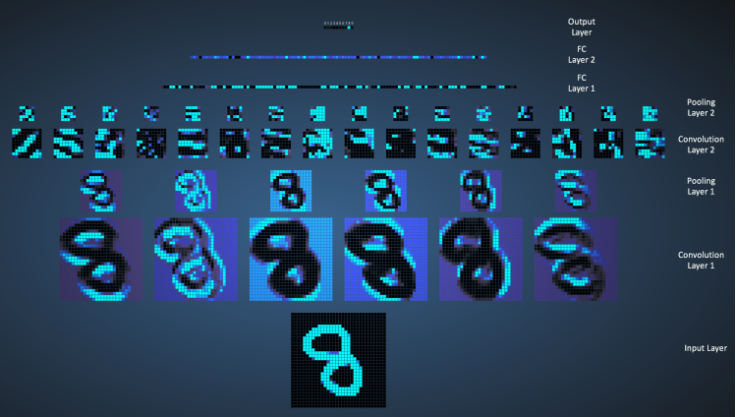

■ 3차원 합성곱
    
    이미지의 색깔이 보통 흑백이 아니라 RGB(Red, Green, Blue) 컬러이므로 RGB 컬러에대해 합성곱을 해야한다.
    
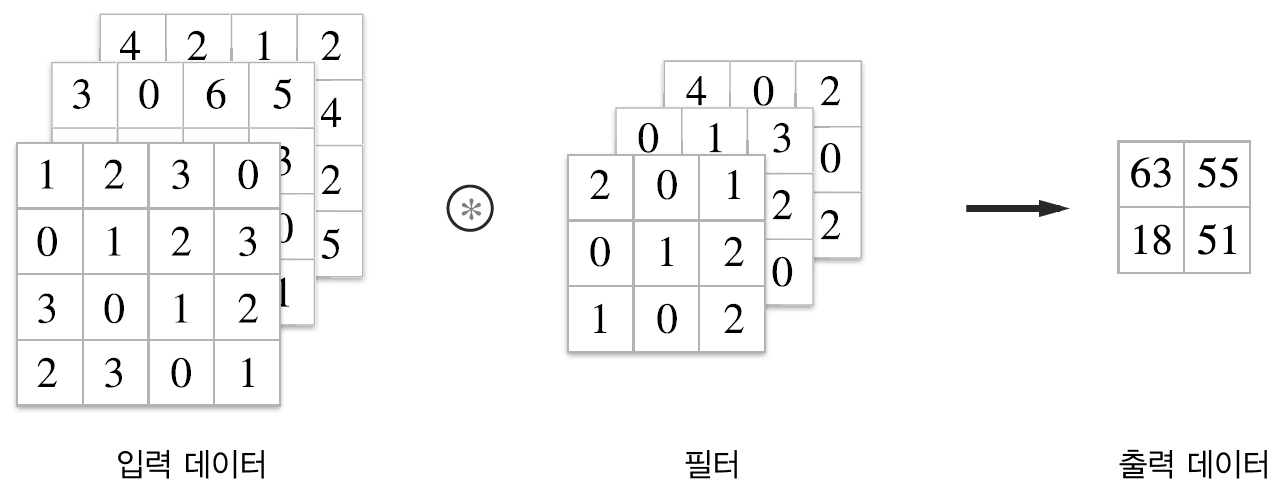
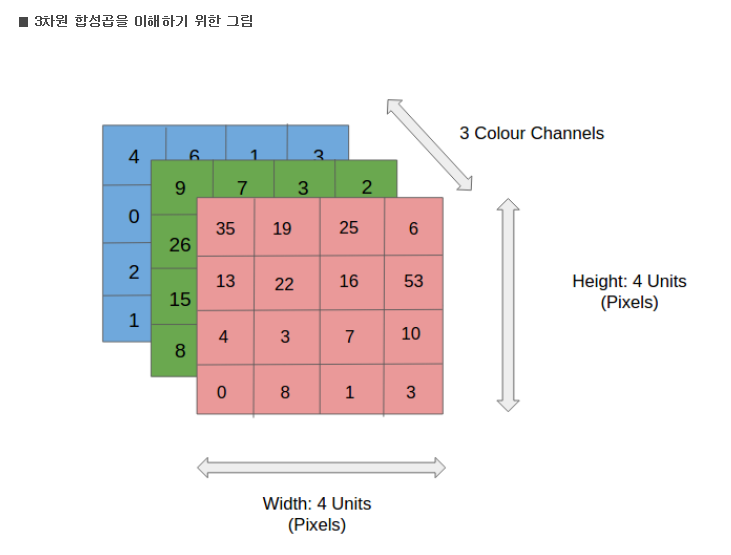

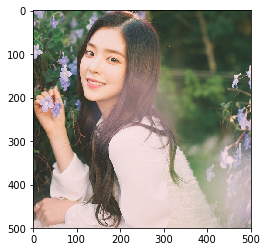

In [39]:
# 레드벨벳의 아이린 사진을 3차원 행렬로 변환하시오

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##1.이미지 불러오기
img = Image.open('C://img//아이린.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)
plt.show()


[[ 79 113 147 ...,  50  50  50]
 [101 137 169 ...,  51  51  50]
 [116 152 181 ...,  49  49  49]
 ..., 
 [219 219 222 ..., 163 173 184]
 [222 222 224 ..., 163 174 184]
 [222 223 225 ..., 165 176 184]]


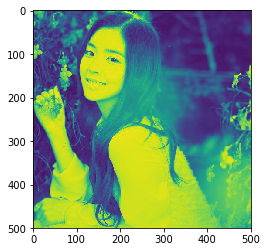

In [36]:
# red 행렬만 출력하고 시각화하기

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

##1.이미지 불러오기
img = plt.imread('C://img//아이린.jpg')
# img = plt.imread('C://img//수제맥주.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])  # 가로, 세로, 색상
print(img_pixel[:,:,0])      # 0: red, 1: green, 2:blue
plt.show()

(3, 5, 5)
[[2 2 1 1 0]
 [0 0 1 0 0]
 [0 2 0 0 1]
 [1 2 1 1 1]
 [1 0 1 0 1]]


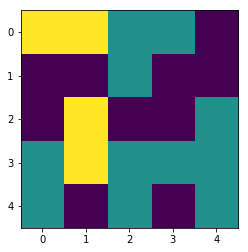

In [56]:
# 아래의 data의 shape를 확인하시오

import numpy as np
import matplotlib.pyplot as plt

data = np.array(
       [
         [[2, 2, 1, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 2, 0, 0, 1],
          [1, 2, 1, 1, 1],    #  --->  Red 
          [1, 0, 1, 0, 1]],
         [[2, 0, 0, 0, 1],
          [0, 2, 2, 0, 1],
          [0, 0, 0, 0, 2],    # ---->  Green
          [0, 1, 2, 0, 1],
          [2, 0, 2, 2, 2]],
         [[4, 2, 1, 2, 2],
          [0, 1, 0, 4, 1],      # ---->  Blue
          [3, 0, 6, 2, 1],
          [4, 2, 4, 5, 4],
          [0, 1, 2, 0, 1]]
       ])

print(data.shape)  # 색상, 가로, 세로


# re행렬만 가져오고 시각화 하시오

print(data[0,:,:])   # == data[0]
plt.imshow(data[0,:,:])
plt.show()

[[[ 1  1 -1 -1  0  0  1  1  0]
  [-1 -1  0  0 -1  1  0 -1  0]
  [-1  1  1 -1  1 -1  0  0 -1]]]
(1, 3, 9)
3
[[[ 1  1 -1]
  [-1  0  0]
  [ 1  1  0]]

 [[-1 -1  0]
  [ 0 -1  1]
  [ 0 -1  0]]

 [[-1  1  1]
  [-1  1 -1]
  [ 0  0 -1]]]
(3, 3, 3)
3


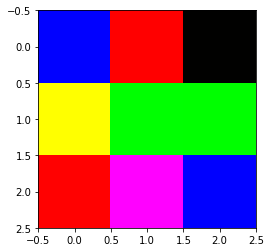

In [123]:
# filter 만들기
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],[-1,-1,0,0,-1,1,0,-1,0],[-1,1,1,-1,1,-1,0,0,-1]]])

print(Filter)

print(Filter.shape)
print(Filter.ndim)

# shape 변경
print(Filter.reshape(3,3,3))
Filter = np.array(Filter).reshape(3,3,3)

print(Filter.shape)
print(Filter.ndim)

plt.imshow(Filter.astype(np.uint8)) # 위의 행렬을 완전 검정으로 변환
plt.show()

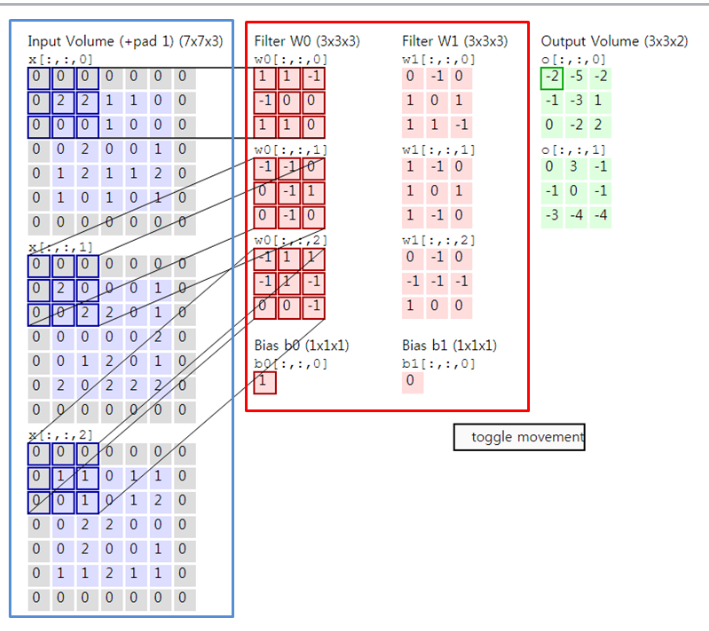

In [133]:
data = np.array(
       [
         [[2, 2, 1, 1, 0],
          [0, 0, 1, 0, 0],
          [0, 2, 0, 0, 1],
          [1, 2, 1, 1, 1],    #  --->  Red 
          [1, 0, 1, 0, 1]],
         [[2, 0, 0, 0, 1],
          [0, 2, 2, 0, 1],
          [0, 0, 0, 0, 2],    # ---->  Green
          [0, 1, 2, 0, 1],
          [2, 0, 2, 2, 2]],
         [[4, 2, 1, 2,2],
          [0, 1, 0, 4,1],      # ---->  Blue
          [3, 0, 6, 2,1],
          [4, 2, 4, 5,4],
          [0, 1, 2, 0, 1]]
       ])
 
print (data) 

# data_red = np.pad(data[0,:,:], pad_width=1, mode='constant', constant_values=0)

# data_green = np.pad(data[1,:,:], pad_width=1, mode='constant', constant_values=0)

# data_blue = np.pad(data[2,:,:], pad_width=1, mode='constant', constant_values=0)
# print(data_red,data_green,data_blue)

# 0,0: data 전체의 앞,뒤 , 1,1 : 위아래 갯수, 1,1: 양옆 갯수
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
print(pad)

[[[2 2 1 1 0]
  [0 0 1 0 0]
  [0 2 0 0 1]
  [1 2 1 1 1]
  [1 0 1 0 1]]

 [[2 0 0 0 1]
  [0 2 2 0 1]
  [0 0 0 0 2]
  [0 1 2 0 1]
  [2 0 2 2 2]]

 [[4 2 1 2 2]
  [0 1 0 4 1]
  [3 0 6 2 1]
  [4 2 4 5 4]
  [0 1 2 0 1]]]
[[[0 0 0 0 0 0 0]
  [0 2 2 1 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 2 1 1 1 0]
  [0 1 0 1 0 1 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 2 0 0 0 1 0]
  [0 0 2 2 0 1 0]
  [0 0 0 0 0 2 0]
  [0 0 1 2 0 1 0]
  [0 2 0 2 2 2 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 4 2 1 2 2 0]
  [0 0 1 0 4 1 0]
  [0 3 0 6 2 1 0]
  [0 4 2 4 5 4 0]
  [0 0 1 2 0 1 0]
  [0 0 0 0 0 0 0]]]


In [140]:
# 1 zero padding 한 Red 행렬의 결과에서 3X3 행렬만 추출하시오
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)), mode='constant', constant_values=0)
# print(pad)

red=pad[0]

print(red[:3,:3])

# 모든 RGB의 3x3행렬을 각각 뽑으시오
print(pad[1,:3,:3])
print(pad[2,:3,:3])

[[0 0 0]
 [0 2 2]
 [0 0 0]]
[[0 0 0]
 [0 2 0]
 [0 0 2]]
[[0 0 0]
 [0 4 2]
 [0 0 1]]


In [142]:
# 아래의 필터에서 아래의 행렬을 추출하시오
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],   \
                  [-1,-1,0,0,-1,1,0,-1,0], \
                  [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)
# 결과 :
#   1  1 -1
#  -1  0  0 
#   1  1  0

print(Filter[0])

[[ 1  1 -1]
 [-1  0  0]
 [ 1  1  0]]


In [143]:
# 위의 3개의 행렬중 Red 행렬과 아래의 filter 중 Red 행렬과 합성곱을 수행하시오 !
pad[0,:3,:3] * Filter[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [150]:
# 아래의 원본 이미지 RGB  3개의 행렬과 아래의 필터 RGB 3개의 
#          행렬을 각각 행렬곱 한후 그 원소들을 다 합친 결과 숫자 하나를 
#          출력하시오 ! ( 3차원 합성곱 연산) 
         
# [[0 0 0]         1  1 -1     0  0  0
#  [0 2 2]     *  -1  0  0  =  0  0  0
#  [0 0 0]]        1  1  0     0  0  0

# [[0 0 0]        -1 -1  0     0  0  0
#  [0 2 0]     *   0 -1  1  =  0 -2  0
#  [0 0 2]]        0 -1  0     0  0  0 

# [[0 0 0]        -1  1  1     0  0  0
#  [0 1 1]     *  -1  1 -1  =  0  1  -1
#  [0 0 1]]        0  0 -1     0  0  -1

# 결과 : - 3

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)),
           mode='constant', constant_values=0)

red = pad[0,:3,:3] * Filter[0]
green = pad[1,:3,:3] * Filter[1]
blue = pad[2,:3,:3] * Filter[2]

# print(red)
# print(green)
# print(blue)
print(np.sum(red+green+blue))

[[[0 0 0 0 0 0 0]
  [0 2 2 1 1 0 0]
  [0 0 0 1 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 2 1 1 1 0]
  [0 1 0 1 0 1 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 2 0 0 0 1 0]
  [0 0 2 2 0 1 0]
  [0 0 0 0 0 2 0]
  [0 0 1 2 0 1 0]
  [0 2 0 2 2 2 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 1 1 0 1 1 0]
  [0 0 1 0 1 2 0]
  [0 0 2 2 0 0 0]
  [0 0 2 0 0 1 0]
  [0 1 1 2 1 1 0]
  [0 0 0 0 0 0 0]]]
-3


In [162]:
# 1칸 슬라이드한 원본 이미지의 3x3과 filter rgb와의 곱을 구하시오
# print(pad)
# print(pad[0,:3,1:3+1])

red = pad[0,:3,1:3+1] * Filter[0]
green = pad[1,:3,1:3+1] * Filter[1]
blue = pad[2,:3,1:3+1] * Filter[2]

# print(red)
# print(green)
# print(blue)
print(np.sum(red+green+blue))

-4


In [195]:
# 위의 그림을 파이썬으로 구현하시오

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])
pad=np.pad(data,pad_width=((0,0),(1,1),(1,1)),
           mode='constant', constant_values=0)

result = []

for i in range(pad.shape[2]-2):
    for j in range(pad.shape[1]-2):
#         red = pad[0,i:3+i,j:3+j] * Filter[0]
#         green = pad[1,i:3+i,j:3+j] * Filter[1]
#         blue = pad[2,i:3+i,j:3+j] * Filter[2]
#         # print(i,j)
#         result.append(np.sum(red+green+blue))
        
        result1 = pad[:,i:i+3,j:j+3] * Filter
        result.append(np.sum(result1))
        
# output은 input과 shape이 같아야한다.
print(np.array(result).reshape(data.shape[1:]))

[[-3 -4 -6 -1 -3]
 [-1  2  0  3 -1]
 [-2  0 -4  3 -1]
 [-3  7 -6 -6 -3]
 [-1  2 -3 -3  0]]


■ 합성곱 총정리

    합성곱? 이미지의 특징(feature map)을 추출하는 과정,
            filter(가중치) 를 이용해서 추출한다.

        원본이미지 1장 * 필터 50개 = feature map 의 갯수 (50)

            5 x 5          5 x 5        5 x 5

        ※ 패딩 1을 해주면 입력값과 동일한 shape가 출력될 수 있다.


In [226]:
# 입력행렬과 필터행렬과 스트라이드와 패딩을 입력받아 출력행렬의 shape를 출력하는 함수를 생성하시오

# 위의 그림을 파이썬으로 구현하시오

data = np.array(
    [
        [[2, 2, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 2, 1, 1, 1],  # --->  Red
         [1, 0, 1, 0, 1]],
        [[2, 0, 0, 0, 1],
         [0, 2, 2, 0, 1],
         [0, 0, 0, 0, 2],  # ---->  Green
         [0, 1, 2, 0, 1],
         [2, 0, 2, 2, 2]],
        [[1, 1, 0, 1, 1],
         [0, 1, 0, 1, 2],  # ---->  Blue
         [0, 2, 2, 0, 0],
         [0, 2, 0, 0, 1],
         [1, 1, 2, 1, 1]]
    ])

Filter=np.array([[[1,1,-1,-1,0,0,1,1,0],   \
                  [-1,-1,0,0,-1,1,0,-1,0], \
                  [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)

def output(I,F,S,P):

    H = I.shape[1]
    FH = F.shape[1]

    return int(1+(H + 2*P - FH) / S)

def output_shape(inputs, Filter, stride, padding):
    n = padding
    
    pad=np.pad(data,pad_width=((0,0),(n,n),(n,n)),
               mode='constant', constant_values=0)

    result = []

    for i in range(0, pad.shape[2]-stride-1, stride):
        for j in range(0, pad.shape[1]-stride-1, stride):
            result1 = pad[:,i:i+Filter.shape[1],j:j+Filter.shape[2]] * Filter
            result.append(np.sum(result1))

    # output은 input과 shape이 같아야한다.
    k = output(inputs,Filter,stride,padding)
    outputs = np.array(result).reshape((k,k))
    
    return outputs

print(output_shape(data, Filter, 1, 1))
print(output_shape(data, Filter, 1, 2))
# print(output_shape(data, Filter, 2, 1))

[[-3 -4 -6 -1 -3]
 [-1  2  0  3 -1]
 [-2  0 -4  3 -1]
 [-3  7 -6 -6 -3]
 [-1  2 -3 -3  0]]
[[-1 -1  4  2  1  0  0]
 [ 1 -3 -4 -6 -1 -3 -1]
 [-1 -1  2  0  3 -1 -3]
 [ 0 -2  0 -4  3 -1 -3]
 [-1 -3  7 -6 -6 -3 -2]
 [ 0 -1  2 -3 -3  0 -3]
 [ 0  1  0  1 -4 -3 -2]]
